In [42]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
def fct_scores_mse(Y_true, Y_pred, liste_stations):
    
    Y_true = Y_true.sort_values(by = ["Date"])
    Y_pred = Y_pred.sort_values(by = ["Date"])
    
    liste_mse = []
    for code in liste_stations:
        liste_mse.append(np.mean(np.square(Y_true[code] - Y_pred[code])))
    resultat = pd.DataFrame({"Code station": liste_stations, "MSE": liste_mse})
    return resultat

In [3]:
stations_debit = pd.read_csv("../Data/Base/Stations_Debit.csv")
liste_stations = list(stations_debit["Code station"])

mesures_train_X = pd.read_csv("../Data/Base/Mesures_Train_X.csv")
mesures_train_X["Date"] = pd.to_datetime(mesures_train_X["Date"], format = "%Y/%m/%d %H:%M:%S")
#mesures_train_Y = pd.read_csv("../Data/Base/Mesures_Train_Y.csv")
#mesures_train_Y["Date"] = pd.to_datetime(mesures_train_Y["Date"], format = "%Y/%m/%d %H:%M:%S")
#Pas comme le modèle GAM, on n'a pas utilisé mesures_train_Y.

train_split_X = pd.read_csv("../Data/Base/Index_CV_X.csv")
#train_split_Y = pd.read_csv("../Data/Base/Index_CV_Y.csv")

mesures_test_X = pd.read_csv("../Data/Base/Mesures_Test_X.csv")
mesures_test_X["Date"] = pd.to_datetime(mesures_test_X["Date"], format = "%Y/%m/%d %H:%M:%S")
#mesures_test_Y = pd.read_csv("../Data/Base/Mesures_Test_Y.csv")
#mesures_test_Y["Date"] = pd.to_datetime(mesures_test_Y["Date"], format = "%Y/%m/%d %H:%M:%S")

period_train= pd.read_csv("../Data/Spline/period_train_k10.csv")
period_train["Date"] = pd.to_datetime(period_train["Date"], format = "%Y/%m/%d %H:%M:%S")
period_test= pd.read_csv("../Data/Spline/period_test_k10.csv")
period_test["Date"] = pd.to_datetime(period_test["Date"], format = "%Y/%m/%d %H:%M:%S")

debit = mesures_train_X[liste_stations]-period_train[liste_stations]
debit=pd.concat([mesures_train_X["Date"], debit], axis=1)
mesures_train_X=pd.concat([debit, mesures_train_X.drop(["Date"]+liste_stations, axis=1)], axis=1)

In [4]:
mesures_train_X

,Date,O0200020,O2620010,O6140010,O9000010,K0030020,K0100020,K0260020,K0550010,K0690010,...,Vitesse_vent_07747,Temperature_07747,Humidite_07747,Precipitations_07747,Pression_07761,Direction_vent_07761,Vitesse_vent_07761,Temperature_07761,Humidite_07761,Precipitations_07761
0,2010-01-01 00:00:00,-2.615789,-45.182606,-121.935854,-153.493118,-0.402413,-1.116467,-3.683907,-14.255002,-47.624530,...,7.733333,10.333333,71.000000,0.133333,99393.333333,206.666667,8.400000,14.233333,90.000000,0.000000
1,2010-01-01 02:00:00,3.484211,-42.182606,-115.935854,-139.493118,-0.382413,-1.126467,-3.083907,-15.455002,-47.514530,...,7.733333,10.333333,71.000000,0.133333,99393.333333,206.666667,8.400000,14.233333,90.000000,0.000000
2,2010-01-01 04:00:00,5.284211,-35.182606,-106.935854,-143.493118,-0.322413,-1.146467,-2.213907,-15.155002,-47.494530,...,11.800000,10.000000,61.000000,0.000000,99180.000000,220.000000,9.800000,14.300000,90.000000,0.000000
3,2010-01-01 06:00:00,-1.515789,-32.182606,-92.935854,-163.493118,-0.282413,-1.086467,-2.813907,-16.255002,-47.484530,...,9.066667,10.533333,50.333333,0.000000,99193.333333,240.000000,6.666667,12.900000,78.000000,0.533333
4,2010-01-01 08:00:00,3.384211,-35.182606,-77.935854,-187.493118,-0.282413,-0.946467,-2.313907,-15.655002,-47.404530,...,9.066667,11.200000,43.000000,0.000000,99253.333333,253.333333,9.066667,11.800000,74.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2019-12-31 14:00:00,13.968514,40.086233,219.698964,460.541167,0.658297,2.356762,6.605803,8.714141,34.752309,...,1.533333,13.133333,68.666667,0.000000,103073.333333,243.333333,1.800000,12.366667,70.333333,0.000000
43820,2019-12-31 16:00:00,20.668514,41.086233,232.698964,460.541167,0.658297,2.336762,6.605803,6.214141,34.452309,...,2.400000,12.400000,74.000000,0.000000,103040.000000,310.000000,1.200000,12.500000,67.000000,0.000000
43821,2019-12-31 18:00:00,23.368514,36.086233,233.698964,450.541167,0.648297,2.326762,6.405803,5.314141,34.152309,...,1.866667,8.800000,84.666667,0.000000,103066.666667,136.666667,1.733333,10.833333,74.333333,0.000000
43822,2019-12-31 20:00:00,12.468514,33.086233,223.698964,450.541167,0.628297,2.296762,6.205803,7.714141,33.852309,...,1.633333,6.666667,89.666667,0.000000,103073.333333,50.000000,2.400000,9.100000,81.000000,0.000000


### Essaie 1 Random Forest regression
input: le jour [J-(back_begin), J-(back-end)] de toutes les stations de riviére et météo

prédire: le jour J de toutes les stations de rivière

On suppose le modèle avec saisonnalité (calculé dans le modèle GAM par exemple)

$Y_t \sim \sum_{j \in C} (Y_{t-begin}^j + \ldots + Y_{t-end}^j) + \sum_{k \in D} (M_{t-begin}^k + \ldots + M_{t-end}^k) + S_t$

$Y_t^j$ : débit d'eau en temps $t$ à la station rivière $j\in C$

$M_{t-begin}^k$ : météo (plusieurs variables) en temps $t$ (de l'année) à la station météo $k\in D$

$S_t$: saisonnalité débit d'eau (calculé dans le modèle GAM par exemple). Par le résultat GAM, on utilise knot=10 pour $S_t$.

Peut-être il est intéressant de regarder les recherches récentes sur random forest vectoriel, qui prédit un vecteur dont les variables sont non indépendants. Pour l'instant faisons le cas simple: supposons que les débits d'eau des toutes les stations d'un même temps sont indépendants entre eux.

Pour l'instant on n'a pas normalisé les input. Plusieurs méthodes de normalisation sont possibles.

In [39]:
def train_test_split(data, n_test):
    return data[:-n_test, :], data[-n_test:, :]

def random_forest(train, test, liste_stations):
    resultat=pd.DataFrame()

    for code in tqdm(liste_stations):
        trainX=train.drop(["Date"]+[code], axis=1)
        cols = list()
        col_names = list()
        # input sequence (t-(back_begin), ... t-(back-end))
        for i in range(back_begin, back_end, -1):
            cols.append(trainX.shift(i))
            names = list(map(lambda x: x+"-"+str(i), trainX.columns.values))
            col_names.append(names)
        trainX = pd.concat(cols, axis=1)
        trainX.columns = col_names
        trainX.dropna(inplace=True)
        trainX = trainX.values
        
        # On fait la même chose pour testX pour décalage de temps
        testX=test.drop(["Date"]+[code], axis=1)
        cols = list()
        col_names = list()
        # input sequence (t-(back_begin), ... t-(back-end))
        for i in range(back_begin, back_end, -1):
            cols.append(testX.shift(i))
            names = list(map(lambda x: x+"-"+str(i), testX.columns.values))
            col_names.append(names)
        testX = pd.concat(cols, axis=1)
        testX.columns = col_names
        testX.dropna(inplace=True)
        testX = testX.values
        
        #fitting and prediction
        trainy = np.asarray(train[code])
        trainy=trainy[7:,]
        model = RandomForestRegressor(n_estimators=10)
        model.fit(trainX, trainy)
        yhat = model.predict(testX)
        composante = pd.DataFrame(yhat, columns = [code])
        resultat = pd.concat([resultat, composante], axis = 1)
    return resultat

    

In [40]:
back_begin=7
back_end=6 # On utilise seuelement le jour J-7

#Pas comme le modèle GAM, on n'a pas utilisé mesures_train_Y.

resultat = random_forest(mesures_train_X, mesures_test_X, liste_stations)

100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [32:39<00:00, 75.38s/it]


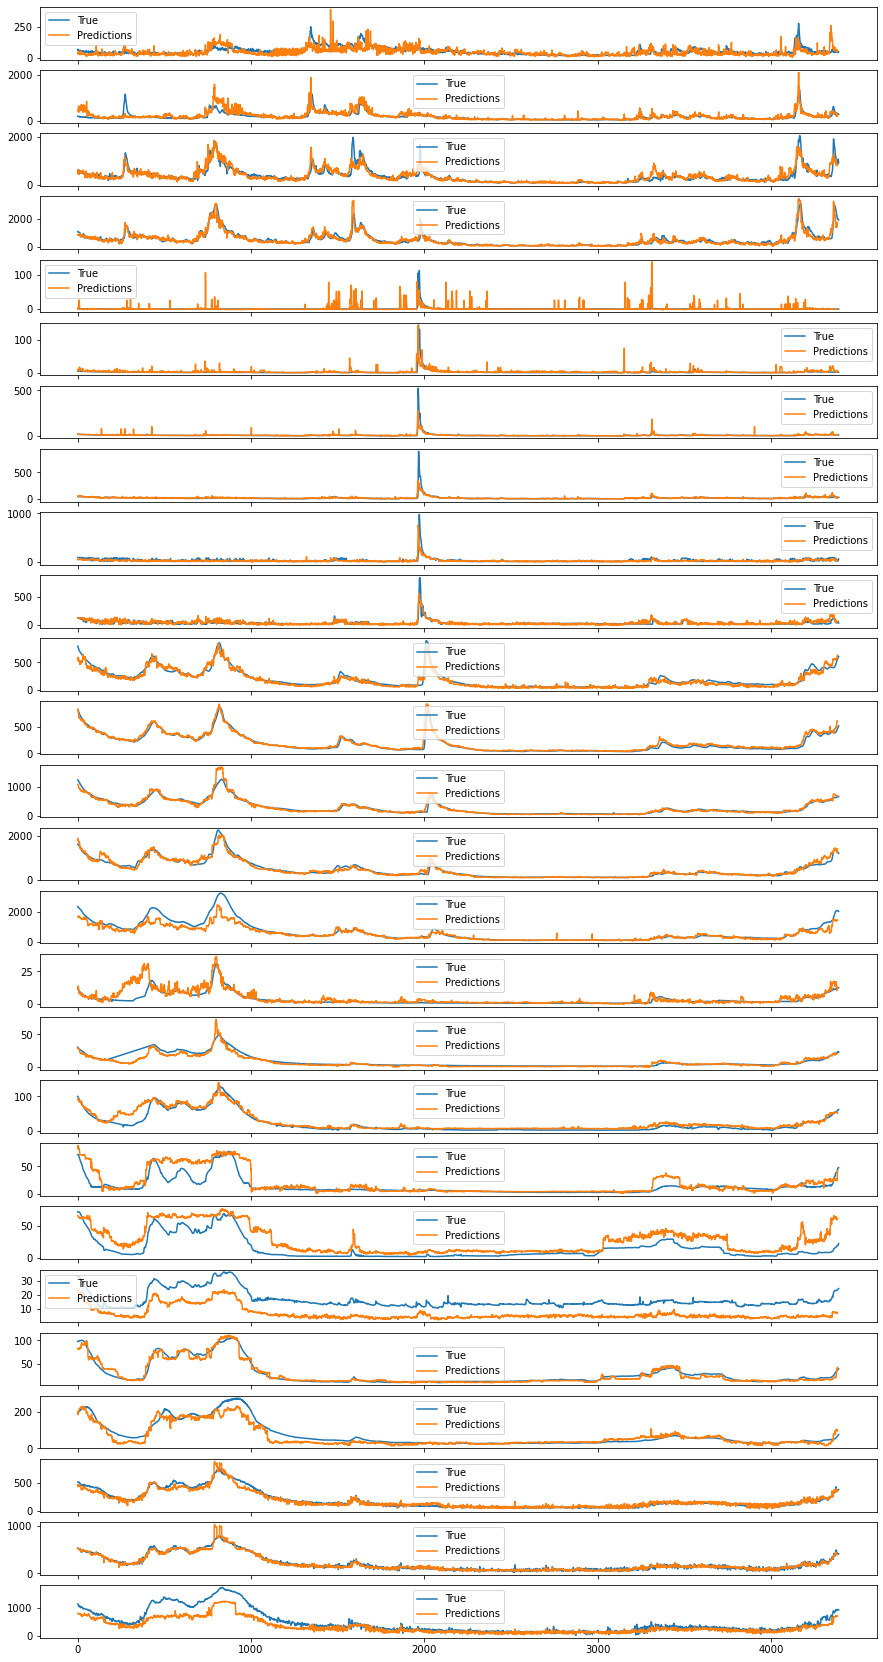

In [43]:
resultat.columns = liste_stations
n_stations = len(liste_stations)
fig, axs = plt.subplots(n_stations, 1, figsize = (15,30), sharex=True)
for i in range(n_stations):
    code = liste_stations[i]
    axs[i].plot(mesures_test_X[code], label = "True")
    axs[i].plot(resultat[code], label = "Predictions")
    axs[i].legend()

In [44]:
resultat.to_csv("../Data/RF/pred_RF.csv",index = False)